In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pprint import pprint
import os

In [2]:
p1 = os.path.join("raw","GlobalLandTemperaturesByCountry.csv")
df = pd.read_csv(p1,encoding='UTF-8')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
df['Year'] = pd.to_datetime(df['dt']).dt.year
df['Country'] = df['Country'].replace('Åland','Aland')
df1 = df.groupby(['Country','Year']).mean()
df1 = df1.dropna().reset_index()
df1 = df1[df1['Year']>=1850]
df1 = df1.reset_index(drop=True)

In [4]:
df1.head()

,Country,Year,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,1850,13.326083,1.961917
1,Afghanistan,1851,13.605667,2.048500
2,Afghanistan,1852,13.541167,2.253833
3,Afghanistan,1853,13.455833,2.112833
4,Afghanistan,1854,13.605750,2.213333


<AxesSubplot:xlabel='Year'>

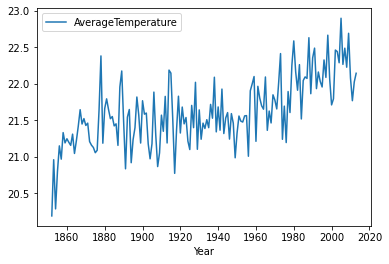

In [5]:
p = df1[df1['Country']=='Australia']
p.plot('Year','AverageTemperature')

In [6]:
df1.to_csv('cleaned/avg_temp_per_country.csv',index=False)

In [7]:
p2 = os.path.join("raw","geojson_countries.json")
import json
from pprint import pprint as pp
with open(p2) as f:
  data = json.load(f)

In [8]:
countries = []
for i in range(len(data['features'])):
    countries.append(data['features'][i]["properties"]["ADMIN"])

In [9]:
df_mean = df1.groupby(['Country','Year']).mean()
df_mean.reset_index(inplace=True)
# avg_year = df_mean[df_mean['Year'].isin(range(1880,1901))].mean()
# variance = df_mean[df_mean['Year'] == 2013]-avg_year
# variance

In [10]:
mean_country_df = df_mean[df_mean['Year'].isin(range(1880,1901))].groupby('Country').mean().reset_index()
mean_country_df = mean_country_df[['Country','AverageTemperature']]
mean_country_df.head()
merged_df = df_mean.merge(mean_country_df,on='Country')
m_df = merged_df[merged_df['Year'] == 2013]
m_df['temperature_increase'] = m_df['AverageTemperature_x'] - m_df['AverageTemperature_y']
m_df.head()

,Country,Year,AverageTemperature_x,AverageTemperatureUncertainty,AverageTemperature_y,temperature_increase
163,Afghanistan,2013,16.533625,0.570375,13.709857,2.823768
322,Africa,2013,25.208750,0.248250,23.634750,1.574000
486,Aland,2013,6.229750,0.536250,5.069115,1.160635
650,Albania,2013,14.993875,0.544500,12.311845,2.682030
814,Algeria,2013,25.121500,0.437625,22.663187,2.458313


In [11]:
count = 0
for i in range(len(data['features'])):
    country = data['features'][i]["properties"]["ADMIN"]
    country = country.lower()
    for j,c in enumerate(m_df['Country']):
        if c.lower() in country:
            count +=1
            data['features'][i]["properties"]["temperature_increase"] = \
                round(m_df.iloc[j]['temperature_increase'],2)
            data['features'][i]["properties"]["temperature"] = \
                round(m_df.iloc[j]['AverageTemperature_x'],2)
            data['features'][i]["properties"]["baseline"] = \
                round(m_df.iloc[j]['AverageTemperature_y'],2)
            print(country,'found')
        else:
            pass
    print(country,'not foud')
print(count)

aruba found
aruba not foud
afghanistan found
afghanistan not foud
angola found
angola not foud
anguilla found
anguilla not foud
albania found
albania not foud
aland found
aland not foud
andorra found
andorra not foud
united arab emirates found
united arab emirates not foud
argentina found
argentina not foud
armenia found
armenia not foud
american samoa found
american samoa found
american samoa not foud
antarctica not foud
ashmore and cartier islands not foud
french southern and antarctic lands not foud
antigua and barbuda found
antigua and barbuda not foud
australia found
australia not foud
austria found
austria not foud
azerbaijan found
azerbaijan not foud
burundi found
burundi not foud
belgium found
belgium not foud
benin found
benin not foud
burkina faso found
burkina faso not foud
bangladesh found
bangladesh not foud
bulgaria found
bulgaria not foud
bahrain found
bahrain not foud
bahamas found
bahamas not foud
bosnia and herzegovina found
bosnia and herzegovina not foud
bajo nuevo 

In [14]:
import geojson

with open("cleaned/geojson_countries_final.geojson",'w') as outfile:
    geojson.dump(data,outfile)